In [32]:
import numpy as np
import pandas as pd
import json

In [33]:
with open('/home/ubuntu/Documents/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Origin_Data/hand143_panopticdb/hands_v143_14817.json', 'r') as fid:
    dat_all = json.load(fid)
    dat_all= dat_all['root']

In [34]:
cero_point = []
one_point = []
two_point = []
three_point = []
four_point = []
five_point = []
six_point = []
seven_point = []
eight_point = []
nine_point = []
ten_point = []
eleven_point = []
twelve_point = []
thirteen_point = []
fourteen_point = []
fifteen_point = []
sixteen_point = []
seventeen_point = []
eighteen_point = []
nineteen_point = []
twenty_point = []
iterator = {}

for x in range(0, len(dat_all)):
  iterator = dat_all[x]['joint_self']
  cero_point.append(iterator[0])
  one_point.append(iterator[1])
  two_point.append(iterator[2])
  three_point.append(iterator[3])
  four_point.append(iterator[4])
  five_point.append(iterator[5])
  six_point.append(iterator[6])
  seven_point.append(iterator[7])
  eight_point.append(iterator[8])
  nine_point.append(iterator[9])
  ten_point.append(iterator[10])
  eleven_point.append(iterator[11])
  twelve_point.append(iterator[12])
  thirteen_point.append(iterator[13])
  fourteen_point.append(iterator[14])
  fifteen_point.append(iterator[15])
  sixteen_point.append(iterator[16])
  seventeen_point.append(iterator[17])
  eighteen_point.append(iterator[18])
  nineteen_point.append(iterator[19])
  twenty_point.append(iterator[20])

In [35]:
cero = np.array(cero_point)
one = np.array(one_point)
two = np.array(two_point)
three = np.array(three_point)
four = np.array(four_point)
five = np.array(five_point)
six = np.array(six_point)
seven = np.array(seven_point)
eight = np.array(eight_point)
nine = np.array(nine_point)
ten = np.array(ten_point)
eleven = np.array(eleven_point)
twelve = np.array(twelve_point)
thirteen = np.array(thirteen_point)
fourteen = np.array(fourteen_point)
fifteen = np.array(fifteen_point)
sixteen = np.array(sixteen_point)
seventeen = np.array(seventeen_point)
eighteen = np.array(eighteen_point)
nineteen = np.array(nineteen_point)
twenty = np.array(twenty_point)

In [36]:
list_max_x = []
list_min_x = []
for x in range(0, len(one)):
  max_x = max(one[x,0], two[x,0], three[x,0], four[x,0], five[x,0], six[x,0], seven[x,0], eight[x,0], nine[x,0], ten[x,0], eleven[x,0], twelve[x,0], thirteen[x,0], fourteen[x,0], fourteen[x,0], sixteen[x,0], seventeen[x,0], eighteen[x,0], nineteen[x,0], twenty[x,0])
  list_max_x.append(max_x)

for x in range(0, len(one)):
  min_x = min(one[x,0], two[x,0], three[x,0], four[x,0], five[x,0], six[x,0], seven[x,0], eight[x,0], nine[x,0], ten[x,0], eleven[x,0], twelve[x,0], thirteen[x,0], fourteen[x,0], fourteen[x,0], sixteen[x,0], seventeen[x,0], eighteen[x,0], nineteen[x,0], twenty[x,0])
  list_min_x.append(min_x)

max_x = pd.DataFrame(list_max_x, columns= ['max_x'])
min_x = pd.DataFrame(list_min_x, columns= ['min_x'])



In [37]:
list_max_y = []
list_min_y = []
for x in range(0, len(one)):
  max_y = max(one[x,1], two[x,1], three[x,1], four[x,1], five[x,1], six[x,1], seven[x,1], eight[x,1], nine[x,1], ten[x,1], eleven[x,1], twelve[x,1], thirteen[x,1], fourteen[x,1], fourteen[x,1], sixteen[x,1], seventeen[x,1], eighteen[x,1], nineteen[x,1], twenty[x,1])
  list_max_y.append(max_y)

for x in range(0, len(one)):
  min_y = min(one[x,1], two[x,1], three[x,1], four[x,1], five[x,1], six[x,1], seven[x,1], eight[x,1], nine[x,1], ten[x,1], eleven[x,1], twelve[x,1], thirteen[x,1], fourteen[x,1], fourteen[x,1], sixteen[x,1], seventeen[x,1], eighteen[x,1], nineteen[x,1], twenty[x,1])
  list_min_y.append(min_y)

max_y = pd.DataFrame(list_max_y, columns= ['max_y'])
min_y = pd.DataFrame(list_min_y, columns= ['min_y'])

In [38]:
list_n = []
for x in range(0, len(one)):
  list_n.append(x)
len(list_n)

14817

In [39]:
list_n = pd.DataFrame(list_n, columns= ['count'])
max_x = list_n.join(max_x).set_index('count')
max_y = list_n.join(max_y).set_index('count')
min_x = list_n.join(min_x).set_index('count')
min_y = list_n.join(min_y).set_index('count')

In [40]:
df = max_x.merge(max_y, on ='count')
df = df.merge(min_x, on ='count')
df = df.merge(min_y, on ='count')

In [41]:
df['dist_x'] = df['max_x'] - df['min_x']
df['dist_y'] = df['max_y'] - df['min_y']

In [42]:
x = max(df['dist_x'])
y = max(df['dist_y'])

print(x, y)
point = 160
point_half = point/2
print(point, point_half)

155.39200000000005 150.19299999999998
160 80.0


In [43]:
df['dist_x_ajust'] = point - df['dist_x']
df['dist_y_ajust'] = point - df['dist_y']

In [44]:
df['max_x_ajust'] = df['dist_x_ajust']/2 + df['max_x']
df['min_x_ajust'] = df['min_x'] - df['dist_x_ajust']/2
df['max_y_ajust'] = df['dist_y_ajust']/2 + df['max_y']
df['min_y_ajust'] = df['min_y'] - df['dist_y_ajust']/2

In [45]:
df['rev_x'] = df['max_x_ajust'] - df['min_x_ajust']
df['rev_y'] = df['max_y_ajust'] - df['min_y_ajust']
print(df['rev_x'].mean())
print(df['rev_y'].mean())

160.0
160.0


In [46]:
from PIL import Image
import os

In [47]:
path = '/home/ubuntu/Documents/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Origin_Data/hand143_panopticdb/imgs/'
path2 = '/home/ubuntu/Documents/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Crop_Images_160x160/'

In [48]:
for j in os.listdir(path):
    img = Image.open(path + j)
    f = int(j.split('.')[0])
    cropped_image = img.crop((df['min_x_ajust'][f], df['min_y_ajust'][f], df['max_x_ajust'][f], df['max_y_ajust'][f]))
    cropped_image.save(path2 + j)

KeyboardInterrupt: 

In [19]:
df.head()

max_x    max_y    min_x    min_y  dist_x   dist_y  dist_x_ajust  \
count                                                                      
0      610.890  451.270  561.127  349.194  49.763  102.076       110.237   
1      633.915  442.423  583.338  344.497  50.577   97.926       109.423   
2      635.713  441.718  584.074  343.251  51.639   98.467       108.361   
3      631.810  444.616  584.295  348.965  47.515   95.651       112.485   
4      627.496  444.208  584.080  347.016  43.416   97.192       116.584   

       dist_y_ajust  max_x_ajust  min_x_ajust  max_y_ajust  min_y_ajust  \
count                                                                     
0            57.924     666.0085     506.0085     480.2320     320.2320   
1            62.074     688.6265     528.6265     473.4600     313.4600   
2            61.533     689.8935     529.8935     472.4845     312.4845   
3            64.349     688.0525     528.0525     476.7905     316.7905   
4            62.808     685.7880     525.7880     475.6120     315.6120   

       rev_x  rev_y  
count                
0      160.0  160.0  
1      160.0  160.0  
2      160.0  160.0  
3      160.0  160.0  
4      160.0  160.0

In [20]:
new_cero = []
new_one = []
new_two = []
new_three = []
new_four = []
new_five = []
new_six = []
new_seven = []
new_eight = []
new_nine = []
new_ten = []
new_eleven = []
new_twelve = []
new_thirteen = []
new_fourteen = []
new_fifteen = []
new_sixteen = []
new_seventeen = []
new_eighteen = []
new_nineteen = []
new_twenty = []

for x in range(0, len(one)):

 z = cero[x,0] - df['min_x_ajust'][x]
 y = cero[x,1] - df['min_y_ajust'][x]
 new_cero.append([z,y])
 
 z = one[x,0] - df['min_x_ajust'][x]
 y = one[x,1] - df['min_y_ajust'][x]
 new_one.append([z,y])

 z = two[x,0] - df['min_x_ajust'][x]
 y = two[x,1] - df['min_y_ajust'][x]
 new_two.append([z,y])

 z = three[x,0] - df['min_x_ajust'][x]
 y = three[x,1] - df['min_y_ajust'][x]
 new_three.append([z,y])

 z = four[x,0] - df['min_x_ajust'][x]
 y = four[x,1] - df['min_y_ajust'][x]
 new_four.append([z,y])

 z = five[x,0] - df['min_x_ajust'][x]
 y = five[x,1] - df['min_y_ajust'][x]
 new_five.append([z,y])

 z = six[x,0] - df['min_x_ajust'][x]
 y = six[x,1] - df['min_y_ajust'][x]
 new_six.append([z,y])

 z = seven[x,0] - df['min_x_ajust'][x]
 y = seven[x,1] - df['min_y_ajust'][x]
 new_seven.append([z,y])

 z = eight[x,0] - df['min_x_ajust'][x]
 y = eight[x,1] - df['min_y_ajust'][x]
 new_eight.append([z,y])

 z = nine[x,0] - df['min_x_ajust'][x]
 y = nine[x,1] - df['min_y_ajust'][x]
 new_nine.append([z,y])
 
 z = ten[x,0] - df['min_x_ajust'][x]
 y = ten[x,1] - df['min_y_ajust'][x]
 new_ten.append([z,y])

 z = eleven[x,0] - df['min_x_ajust'][x]
 y = eleven[x,1] - df['min_y_ajust'][x]
 new_eleven.append([z,y])

 z = twelve[x,0] - df['min_x_ajust'][x]
 y = twelve[x,1] - df['min_y_ajust'][x]
 new_twelve.append([z,y])
 
 z = thirteen[x,0] - df['min_x_ajust'][x]
 y = thirteen[x,1] - df['min_y_ajust'][x]
 new_thirteen.append([z,y])
 
 z = fourteen[x,0] - df['min_x_ajust'][x]
 y = fourteen[x,1] - df['min_y_ajust'][x]
 new_fourteen.append([z,y])

 z = fifteen[x,0] - df['min_x_ajust'][x]
 y = fifteen[x,1] - df['min_y_ajust'][x]
 new_fifteen.append([z,y])
 
 z = sixteen[x,0] - df['min_x_ajust'][x]
 y = sixteen[x,1] - df['min_y_ajust'][x]
 new_sixteen.append([z,y])
 
 z = seventeen[x,0] - df['min_x_ajust'][x]
 y = seventeen[x,1] - df['min_y_ajust'][x]
 new_seventeen.append([z,y])

 z = eighteen[x,0] - df['min_x_ajust'][x]
 y = eighteen[x,1] - df['min_y_ajust'][x]
 new_eighteen.append([z,y])
 
 z = nineteen[x,0] - df['min_x_ajust'][x]
 y = nineteen[x,1] - df['min_y_ajust'][x]
 new_nineteen.append([z,y])
 
 z = twenty[x,0] - df['min_x_ajust'][x]
 y = twenty[x,1] - df['min_y_ajust'][x]
 new_twenty.append([z,y])

In [21]:
new_cero = np.array(new_cero)
new_one = np.array(new_one)
new_two = np.array(new_two)
new_three = np.array(new_three)
new_four = np.array(new_four)
new_five = np.array(new_five)
new_six = np.array(new_six)
new_seven = np.array(new_seven)
new_eight = np.array(new_eight)
new_nine = np.array(new_nine)
new_ten = np.array(new_ten)
new_eleven = np.array(new_eleven)
new_twelve = np.array(new_twelve)
new_thirteen = np.array(new_thirteen)
new_fourteen = np.array(new_fourteen)
new_fifteen = np.array(new_fifteen)
new_sixteen = np.array(new_sixteen)
new_seventeen = np.array(new_seventeen)
new_eighteen = np.array(new_eighteen)
new_nineteen = np.array(new_nineteen)
new_twenty = np.array(new_twenty)

In [22]:
new_points = []

for x in range(0, len(new_cero)):
    new_points.append([new_cero[x], new_one[x], new_two[x], new_three[x], new_four[x], new_five[x], new_six[x], new_seven[x], new_eight[x], new_nine[x], new_ten[x], new_eleven[x], new_twelve[x], new_thirteen[x], new_fourteen[x], new_fifteen[x], new_sixteen[x], new_seventeen[x], new_eighteen[x], new_nineteen[x], new_twenty[x]])

new_points = np.array(new_points)
print(new_points.shape)

(14817, 21, 2)


In [23]:
path = '/home/ubuntu/Documents/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Crop_Images_160x160/'

list_images = []

for l in os.listdir(path):
    list_images.append(l)
    print(l)

list_images.sort()

00003575.jpg
00004124.jpg
00010703.jpg
00002486.jpg
00013516.jpg
00002330.jpg
00002800.jpg
00004275.jpg
00004307.jpg
00010815.jpg
00010417.jpg
00006864.jpg
00000900.jpg
00008592.jpg
00007696.jpg
00010244.jpg
00010500.jpg
00001844.jpg
00005862.jpg
00000786.jpg
00004492.jpg
00013309.jpg
00001942.jpg
00000899.jpg
00007595.jpg
00013027.jpg
00000519.jpg
00013591.jpg
00010496.jpg
00004076.jpg
00011820.jpg
00004719.jpg
00010181.jpg
00003636.jpg
00004913.jpg
00008526.jpg
00010947.jpg
00009120.jpg
00010068.jpg
00000562.jpg
00004100.jpg
00014304.jpg
00010420.jpg
00012476.jpg
00009310.jpg
00012956.jpg
00014124.jpg
00002743.jpg
00010318.jpg
00000951.jpg
00014153.jpg
00002838.jpg
00004063.jpg
00004016.jpg
00001461.jpg
00006301.jpg
00003929.jpg
00003668.jpg
00014583.jpg
00003645.jpg
00011817.jpg
00009204.jpg
00013578.jpg
00010735.jpg
00002942.jpg
00007241.jpg
00011598.jpg
00000639.jpg
00004904.jpg
00011042.jpg
00009052.jpg
00001594.jpg
00014617.jpg
00006855.jpg
00007307.jpg
00006149.jpg
00010577.jpg

In [26]:
list_images[100]

'00000100.jpg'

In [24]:
t = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])

8416


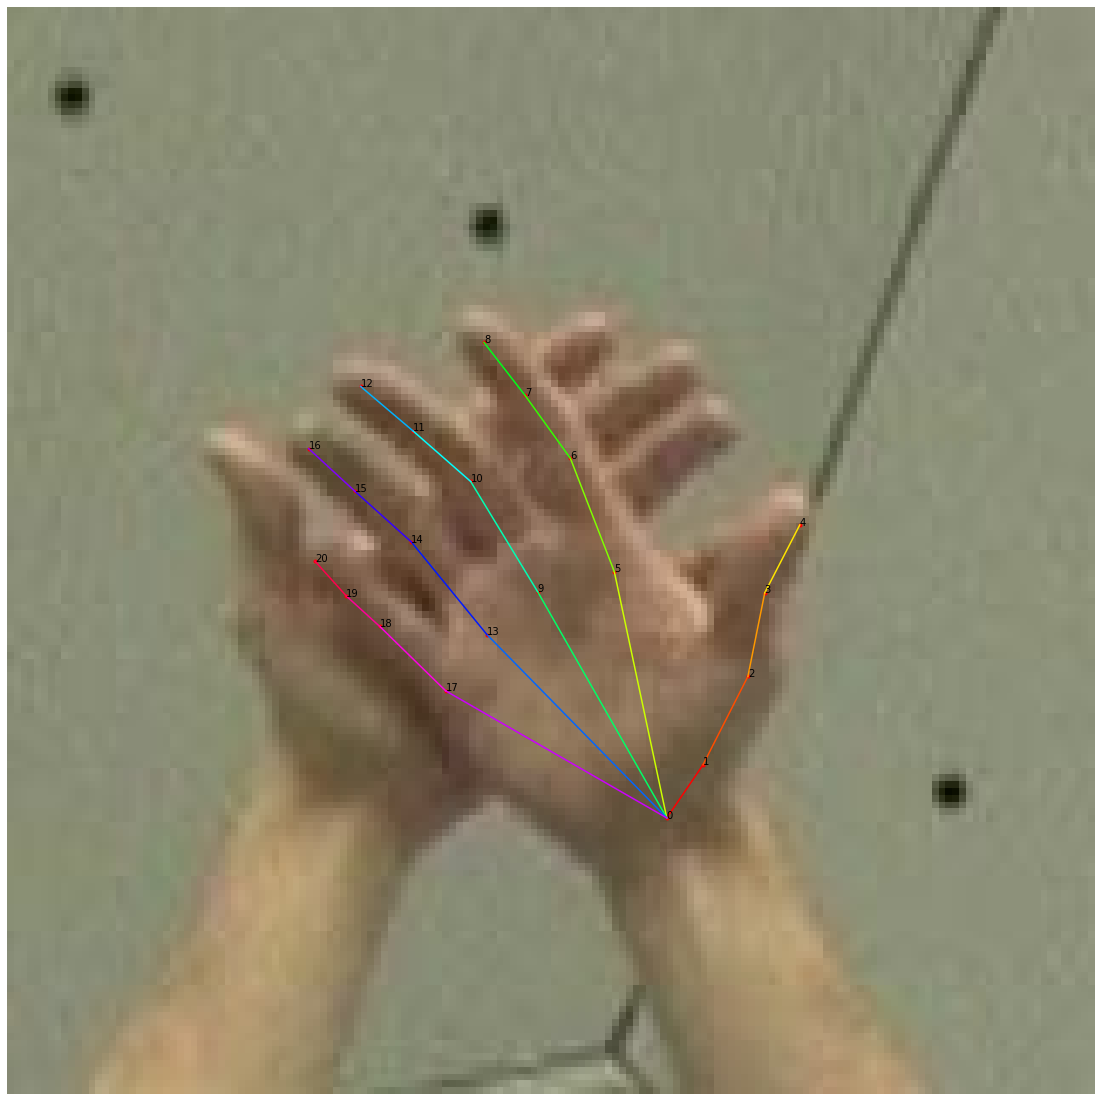

In [64]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

q = np.random.randint(0, 14817)
pts = np.append(new_points[q], t, axis =1)
invalid = pts[:,2]!=1
    

imgPath = '/home/ubuntu/Documents/1. Personal Project - Marcelo Garcia/AI_Project/Hand/Crop_Images_160x160/';
# Plot annotations
plt.clf()
im = plt.imread(imgPath + list_images[q])
plt.imshow(im)

for p in range(pts.shape[0]):
    if pts[p,2]!=0:
        plt.plot(pts[p,0], pts[p,1],'r.')
        plt.text(pts[p,0], pts[p,1], '{0}'.format(p))
for ie, e in enumerate(edges):
    if np.all(pts[e,2]!=0):
        rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
        plt.plot(pts[e,0],pts[e,1],color=rgb)
plt.axis('off')

print(q)

In [66]:
from numpy import save

save('New_Points/Origin_Data/new_points_3D_160x160.npy', new_points)